In [1]:
import os
import sys
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'

In [2]:
with open('../input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)

In [3]:
label_type

{'관계_없음': 0,
 '인물:배우자': 1,
 '인물:직업/직함': 2,
 '단체:모회사': 3,
 '인물:소속단체': 4,
 '인물:동료': 5,
 '단체:별칭': 6,
 '인물:출신성분/국적': 7,
 '인물:부모님': 8,
 '단체:본사_국가': 9,
 '단체:구성원': 10,
 '인물:기타_친족': 11,
 '단체:창립자': 12,
 '단체:주주': 13,
 '인물:사망_일시': 14,
 '단체:상위_단체': 15,
 '단체:본사_주(도)': 16,
 '단체:제작': 17,
 '인물:사망_원인': 18,
 '인물:출생_도시': 19,
 '단체:본사_도시': 20,
 '인물:자녀': 21,
 '인물:제작': 22,
 '단체:하위_단체': 23,
 '인물:별칭': 24,
 '인물:형제/자매/남매': 25,
 '인물:출생_국가': 26,
 '인물:출생_일시': 27,
 '단체:구성원_수': 28,
 '단체:자회사': 29,
 '인물:거주_주(도)': 30,
 '단체:해산일': 31,
 '인물:거주_도시': 32,
 '단체:창립일': 33,
 '인물:종교': 34,
 '인물:거주_국가': 35,
 '인물:용의자': 36,
 '인물:사망_도시': 37,
 '단체:정치/종교성향': 38,
 '인물:학교': 39,
 '인물:사망_국가': 40,
 '인물:나이': 41}

In [4]:
os.getcwd()

'/opt/ml/analysis'

In [5]:
train_path = "../input/data/train/train.tsv"

In [6]:
df = pd.read_csv(train_path, sep="\t", header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


In [8]:
df[1][0][30:34] # 3번부터 4번 + 1까지의 범위에 해당 entity 위치

'랜드로버'

In [9]:
label_types = df[8]
label_types

0          단체:제작
1          관계_없음
2          단체:별칭
3       인물:직업/직함
4         인물:부모님
          ...   
8995       관계_없음
8996    단체:본사_국가
8997    인물:직업/직함
8998       관계_없음
8999    인물:직업/직함
Name: 8, Length: 9000, dtype: object

In [10]:
from collections import Counter
label_type_counter = Counter(label_types)
label_type_counter = sorted(label_type_counter.items(), key=lambda x: x[1], reverse=True)
label_type_counter

[('관계_없음', 4432),
 ('단체:구성원', 815),
 ('인물:소속단체', 683),
 ('인물:직업/직함', 553),
 ('단체:상위_단체', 335),
 ('단체:별칭', 231),
 ('인물:출신성분/국적', 209),
 ('인물:동료', 186),
 ('단체:제작', 171),
 ('인물:부모님', 164),
 ('단체:본사_도시', 135),
 ('단체:본사_국가', 115),
 ('인물:별칭', 103),
 ('인물:배우자', 92),
 ('인물:자녀', 84),
 ('단체:하위_단체', 79),
 ('단체:창립일', 67),
 ('인물:기타_친족', 58),
 ('인물:제작', 56),
 ('인물:형제/자매/남매', 52),
 ('인물:사망_일시', 45),
 ('단체:창립자', 45),
 ('단체:모회사', 44),
 ('인물:출생_일시', 36),
 ('인물:거주_국가', 27),
 ('인물:거주_도시', 26),
 ('단체:본사_주(도)', 23),
 ('단체:정치/종교성향', 18),
 ('인물:종교', 15),
 ('단체:해산일', 15),
 ('인물:거주_주(도)', 12),
 ('단체:주주', 11),
 ('인물:용의자', 11),
 ('인물:학교', 9),
 ('단체:구성원_수', 9),
 ('인물:출생_국가', 8),
 ('인물:사망_원인', 7),
 ('단체:자회사', 6),
 ('인물:나이', 5),
 ('인물:출생_도시', 4),
 ('인물:사망_도시', 3),
 ('인물:사망_국가', 1)]

In [11]:
label_count_df = pd.DataFrame(label_type_counter, columns=["label", "count"])
label_count_df.head()

,label,count
0,관계_없음,4432
1,단체:구성원,815
2,인물:소속단체,683
3,인물:직업/직함,553
4,단체:상위_단체,335


In [12]:
# for hangul fonts

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.4.1
설치위치:  /opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py
설정:  /opt/ml/.config/matplotlib
캐시:  /opt/ml/.cache/matplotlib


In [13]:
import matplotlib
import matplotlib.font_manager

[f.fname for f in matplotlib.font_manager.fontManager.ttflist][0], [f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name][0]

('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf',
 'NanumGothic')

<AxesSubplot:xlabel='label', ylabel='count'>

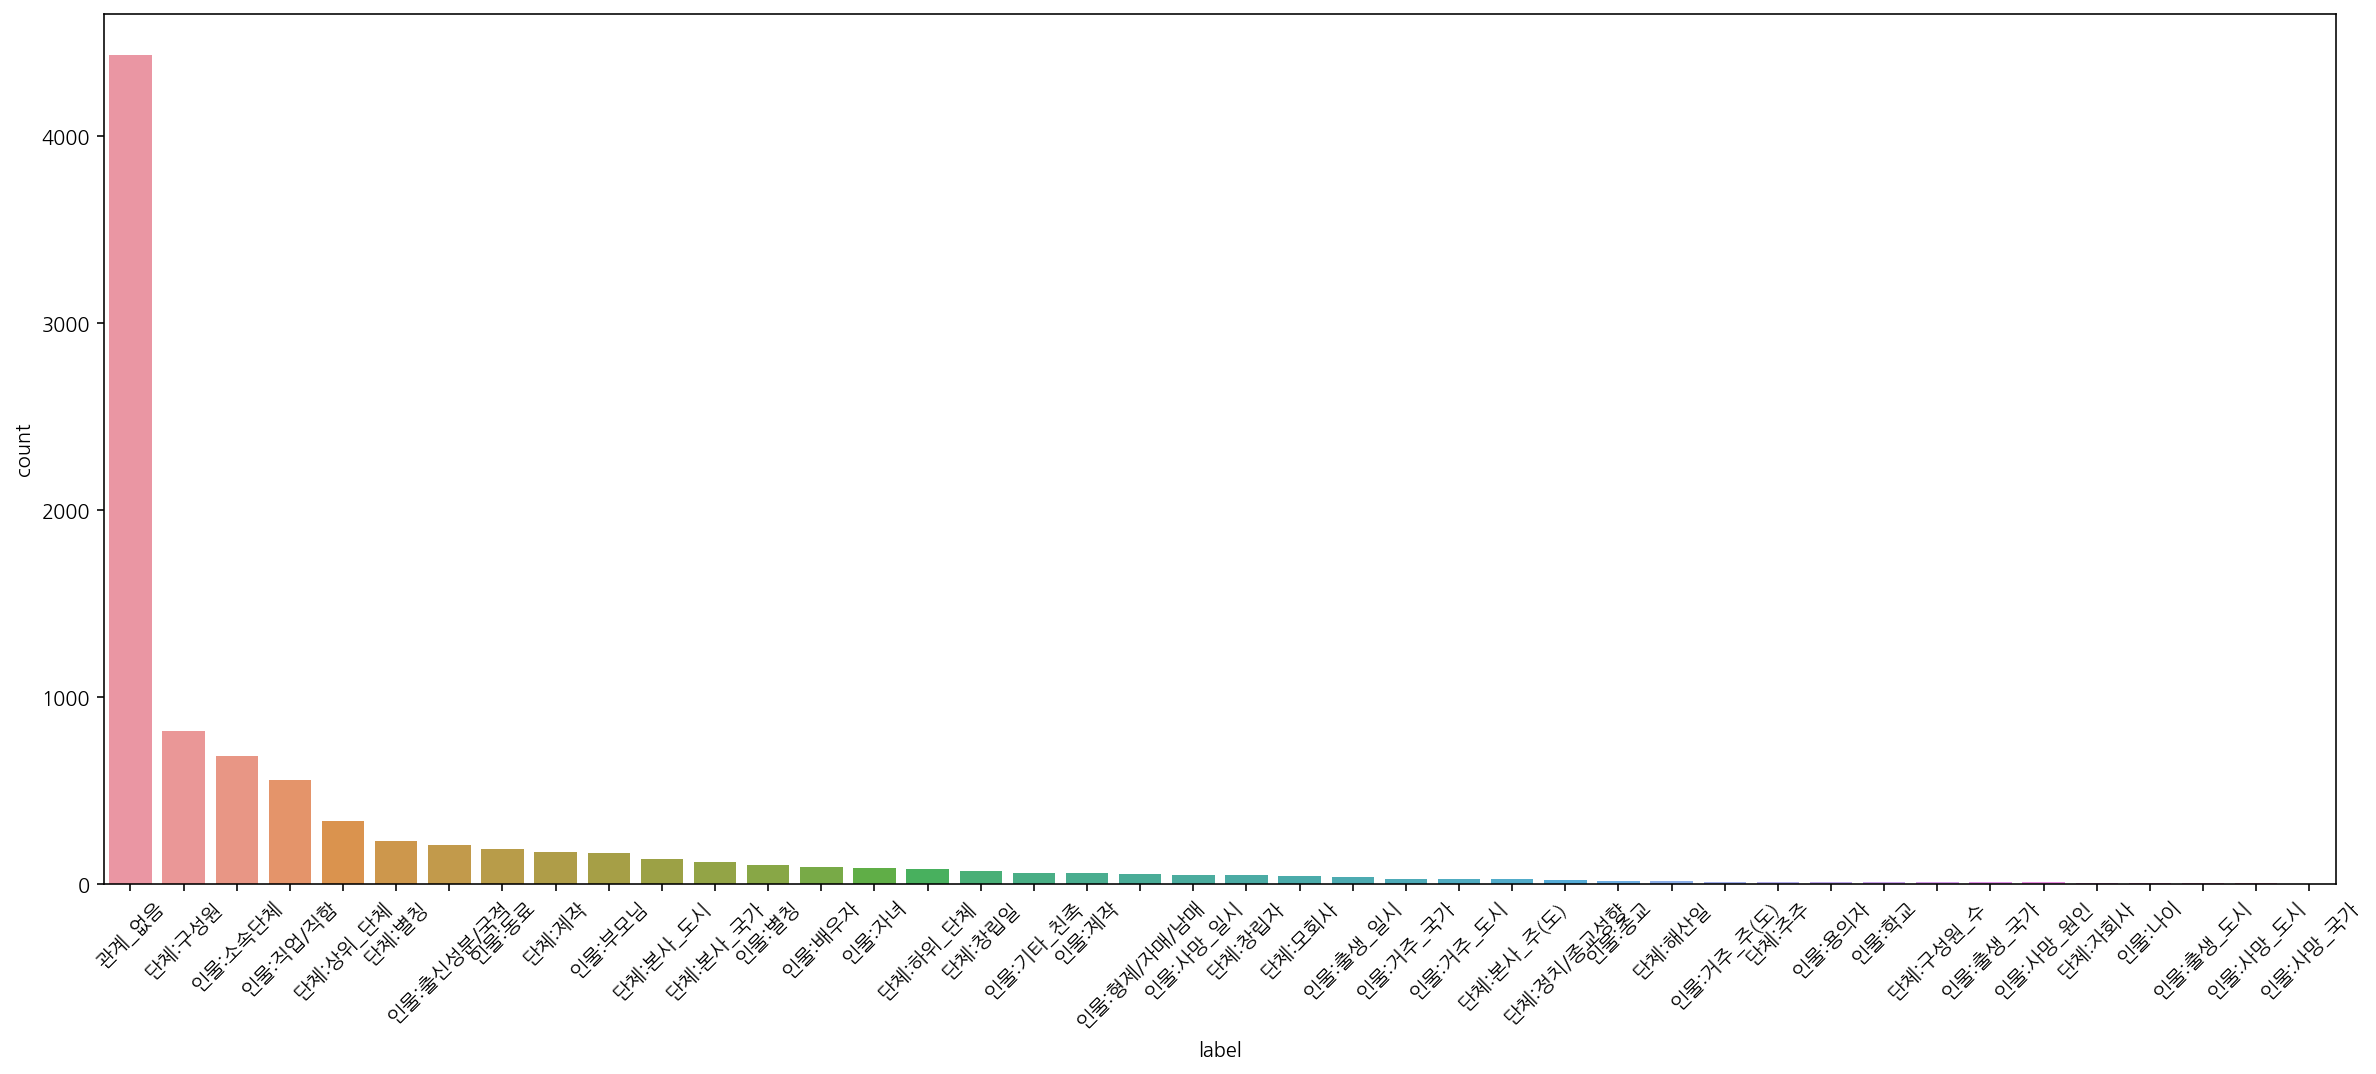

In [19]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
sns.barplot(data=label_count_df, x="label", y="count")

# g = sns.barplot(data=label_count_df, x="label", y="count")
# g.set_xticklabels(g.get_xticklabels(), rotation=30)